In [ ]:
import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
np.random.seed(20)

In [ ]:
train_raw = loadmat('/content/drive/MyDrive/DL_Project/train_32x32.mat')
test_raw = loadmat('/content/drive/MyDrive/DL_Project/test_32x32.mat')

In [ ]:
train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [ ]:
print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [ ]:
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


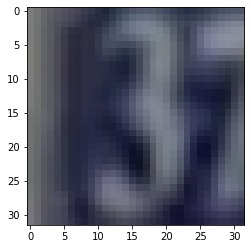

Label:  [3]


In [ ]:
plt.imshow(train_images[12500])
plt.show()

print('Label: ', train_labels[12500])

In [ ]:
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [ ]:
print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [ ]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.15, random_state=22)

In [ ]:
y_val.shape

(10989, 10)

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
aux_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])


lr_schedule = keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = keras.optimizers.Adam(lr=1e-4, amsgrad=True)
aux_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])



In [ ]:
history = aux_model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=30, validation_data=(X_val, y_val),
                              callbacks=[lr_schedule])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
487/487 [==============================] - 65s 66ms/step - loss: 2.4914 - accuracy: 0.1379 - val_loss: 2.2157 - val_accuracy: 0.1949
Epoch 2/30
487/487 [==============================] - 32s 65ms/step - loss: 2.2149 - accuracy: 0.1774 - val_loss: 1.9584 - val_accuracy: 0.3141
Epoch 3/30
487/487 [==============================] - 31s 65ms/step - loss: 1.8274 - accuracy: 0.3612 - val_loss: 0.7820 - val_accuracy: 0.7609
Epoch 4/30
487/487 [==============================] - 31s 64ms/step - loss: 1.0899 - accuracy: 0.6412 - val_loss: 0.4662 - val_accuracy: 0.8601
Epoch 5/30
487/487 [==============================] - 31s 65ms/step - loss: 0.7981 - accuracy: 0.7491 - val_loss: 0.3771 - val_accuracy: 0.8852
Epoch 6/30
487/487 [==============================] - 31s 64ms/step - loss: 0.6390 - accuracy: 0.8019 - val_loss: 0.3828 - val_accuracy: 0.8830
Epoch 7/30
487/487 [==============================] - 31s 64ms/step - loss: 0.5492 - accuracy: 0.8348 - val_loss: 0.3093 - val_accuracy:

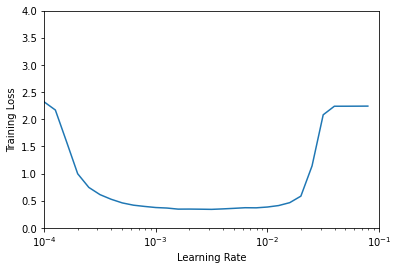

In [ ]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-4, 1e-1, 0, 4])
plt.xlabel('Learning Rate')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   'cnn.h5', 
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=70, validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
487/487 [==============================] - 33s 65ms/step - loss: 2.2482 - accuracy: 0.2040 - val_loss: 1.3011 - val_accuracy: 0.5978
Epoch 2/70
487/487 [==============================] - 31s 64ms/step - loss: 1.4070 - accuracy: 0.4935 - val_loss: 0.6633 - val_accuracy: 0.8188
Epoch 3/70
487/487 [==============================] - 32s 65ms/step - loss: 1.0346 - accuracy: 0.6464 - val_loss: 0.3834 - val_accuracy: 0.8867
Epoch 4/70
487/487 [==============================] - 32s 65ms/step - loss: 0.5449 - accuracy: 0.8401 - val_loss: 0.3083 - val_accuracy: 0.9115
Epoch 5/70
487/487 [==============================] - 32s 65ms/step - loss: 0.4223 - accuracy: 0.8803 - val_loss: 0.2811 - val_accuracy: 0.9167
Epoch 6/70
487/487 [==============================] - 32s 65ms/step - loss: 0.3681 - accuracy: 0.8953 - val_loss: 0.2536 - val_accuracy: 0.9297
Epoch 7/70
487/487 [==============================] - 32s 65ms/step - loss: 0.3409 - accuracy: 0.9042 - val_loss: 0.2376 - val_accuracy:

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

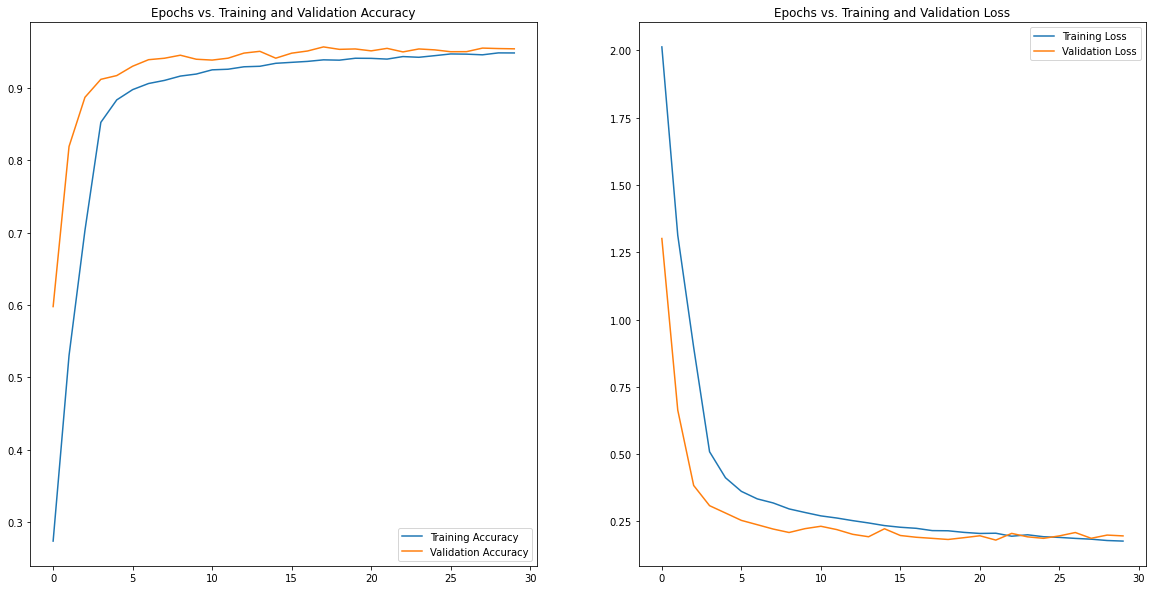

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)
print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.format(test_acc, test_loss))

Test accuracy is: 0.9588 
Test loss is: 0.1741
